In [31]:
%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

# Load data from dbrepo

In [ ]:
from dbrepo.RestClient import RestClient
username = ""   # enter your dbrepo account username here
password = ""   # enter your dbrepo account password here
client = RestClient(endpoint="https://test.dbrepo.tuwien.ac.at", username=username, password=password)
X = client.get_identifier_data(identifier_id="973ce16e-e128-4acb-85e2-eed122ebe14d")                # training data
X_test_final_0 = client.get_identifier_data(identifier_id="45b2fcea-b663-470a-9837-3d4990110c3f")   # test data
Y_solution = client.get_identifier_data(identifier_id="ad98f835-21c5-4b1b-8604-e4058eca9555")       # solution data

In [34]:
X = X.apply(pd.to_numeric, errors="ignore")
X.head()

C:\Users\tatzb\AppData\Local\Temp\ipykernel_15804\1800288863.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors="ignore")


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,0,32000.0,32000.0,32000.0,60 months,10.49,687.65,10+ years,MORTGAGE,120000.0,...,N,1,2015,9,1981,2,2019,2,2019,B
1,5,7000.0,7000.0,7000.0,36 months,6.99,216.11,5 years,RENT,41000.0,...,N,9,2016,2,2006,1,2018,2,2019,A
2,31,15000.0,15000.0,15000.0,36 months,11.55,495.00,9 years,MORTGAGE,35000.0,...,N,7,2018,2,2004,2,2019,2,2019,B
3,33,4000.0,4000.0,4000.0,36 months,13.59,135.92,< 1 year,RENT,27040.0,...,N,7,2017,4,2006,2,2019,2,2019,C
4,44,17600.0,17600.0,17600.0,36 months,20.20,655.88,5 years,MORTGAGE,44200.0,...,N,10,2014,11,1999,11,2017,11,2017,E


In [35]:
X_test_final_0 = X_test_final_0.apply(pd.to_numeric, errors="ignore")
X_test_final_0.head()

C:\Users\tatzb\AppData\Local\Temp\ipykernel_15804\3188436807.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_test_final_0 = X_test_final_0.apply(pd.to_numeric, errors="ignore")


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,6,18000.0,18000.0,18000.0,60 months,15.05,428.70,5 years,RENT,66924.0,...,Cash,N,0,2018,10,2004,2,2019,2,2019
1,9,34975.0,34975.0,34975.0,60 months,20.99,946.00,1 year,RENT,88400.0,...,Cash,N,4,2015,4,2002,2,2019,2,2019
2,17,12375.0,12375.0,12375.0,60 months,24.50,359.61,10+ years,RENT,45000.0,...,Cash,N,9,2013,6,2001,5,2015,9,2016
3,23,25000.0,25000.0,25000.0,60 months,12.13,557.76,10+ years,MORTGAGE,142992.0,...,Cash,N,4,2018,6,2001,2,2019,2,2019
4,25,10000.0,10000.0,10000.0,36 months,8.81,317.12,1 year,MORTGAGE,120000.0,...,Cash,N,10,2018,0,2011,2,2019,2,2019


In [36]:
Y_solution = Y_solution.apply(pd.to_numeric, errors="ignore")
Y_solution.head()

C:\Users\tatzb\AppData\Local\Temp\ipykernel_15804\2318717849.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  Y_solution = Y_solution.apply(pd.to_numeric, errors="ignore")


,id,grade
0,6,B
1,9,B
2,17,B
3,23,B
4,25,B


# General data exploration
## Checking for NaN values

In [37]:
X.isna().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
                           ..
last_pymnt_d_month          0
last_pymnt_d_year           0
last_credit_pull_d_month    0
last_credit_pull_d_year     0
grade                       0
Length: 92, dtype: int64

As we can see, no NaN values are present in the data. Next, I check how many unique values are present for each column.


## Checking unique values in the columns and duplicate rows

In [38]:
unq = X.nunique()
unq

id                          10000
loan_amnt                     821
funded_amnt                   821
funded_amnt_inv               917
term                            2
                            ...  
last_pymnt_d_month             12
last_pymnt_d_year               8
last_credit_pull_d_month       12
last_credit_pull_d_year         8
grade                           7
Length: 92, dtype: int64

I remove features that have only 1 unique value since they don't contain any useful information.

In [39]:
discard = unq.index[unq == 1].tolist()
if discard:
    X = X.drop(*discard, axis=1)
    X_test_final = X_test_final_0.drop(*discard, axis=1)

Now I check for duplicate rows (i.e. identical observations).

In [40]:
dup = X[X.duplicated()]
print(len(dup))

0


## Splitting the data according to datatype (numerical/categorical)

Finally, I split the dataframe columns by datatype in order to be able to easily work with the different kinds of data. The column "ID" is removed from the numerical values since it is just an identifier and provides no information that is useful for the prediction. Additionally I split the prediction variable ("grade") from the rest of the data.

In [41]:
types = X.dtypes
categorical = types.index[types == "object"].tolist()
categorical.remove("grade")
numerical = types.index[types != "object"].tolist()
numerical.remove("id")
y = X["grade"]

# Data visualization and pre-processing
## Target variable

C:\Users\tatzb\AppData\Local\Temp\ipykernel_15804\398023833.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.countplot(X, x="grade", hue="grade", palette=sns.color_palette(), order=grades, legend=False)


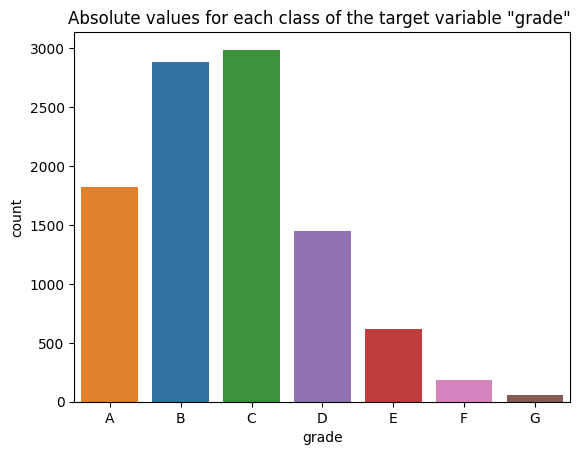

In [42]:
grades = ["A", "B", "C", "D", "E", "F", "G"]
sns.countplot(X, x="grade", hue="grade", palette=sns.color_palette(), order=grades, legend=False)
plt.title('Absolute values for each class of the target variable "grade" ')
plt.savefig(r"..\results\loan_imbalance.png")

As we can see, the worse rating categorys only have very few observations, which will make it hard to train a model to accurately classify such cases $\rightarrow$  the dataset has a significant bias!

## Splitting the data into training and test-set

In [43]:
from sklearn.model_selection import train_test_split
X = X.rename(str, axis="columns")
X_test_final = X_test_final.rename(str, axis="columns")

seed = 1234
X_train, X_test = train_test_split(X, train_size=0.67, random_state=seed)
train_idx = X_train.index
test_idx = X_test.index

y_train = y[train_idx]
y_test = y[test_idx]

## Categorical variables:

C:\Users\tatzb\AppData\Local\Temp\ipykernel_15804\3363520037.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(X, x=variable, hue=variable, legend=False, ax=subplot, palette=sns.color_palette(), stat="percent")
C:\Users\tatzb\AppData\Local\Temp\ipykernel_15804\3363520037.py:3: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(X, x=variable, hue=variable, legend=False, ax=subplot, palette=sns.color_palette(), stat="percent")
C:\Users\tatzb\AppData\Local\Temp\ipykernel_15804\3363520037.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(X, x=variable, hue=variable, legend=False, ax=subplot, palette=sns.color_palette(), stat="percent")
C:\Users\tatzb\AppData\Local\Temp\ipykernel_15804\3363520037.py:3: UserWarning: The palette list has more values (10) than needed (3

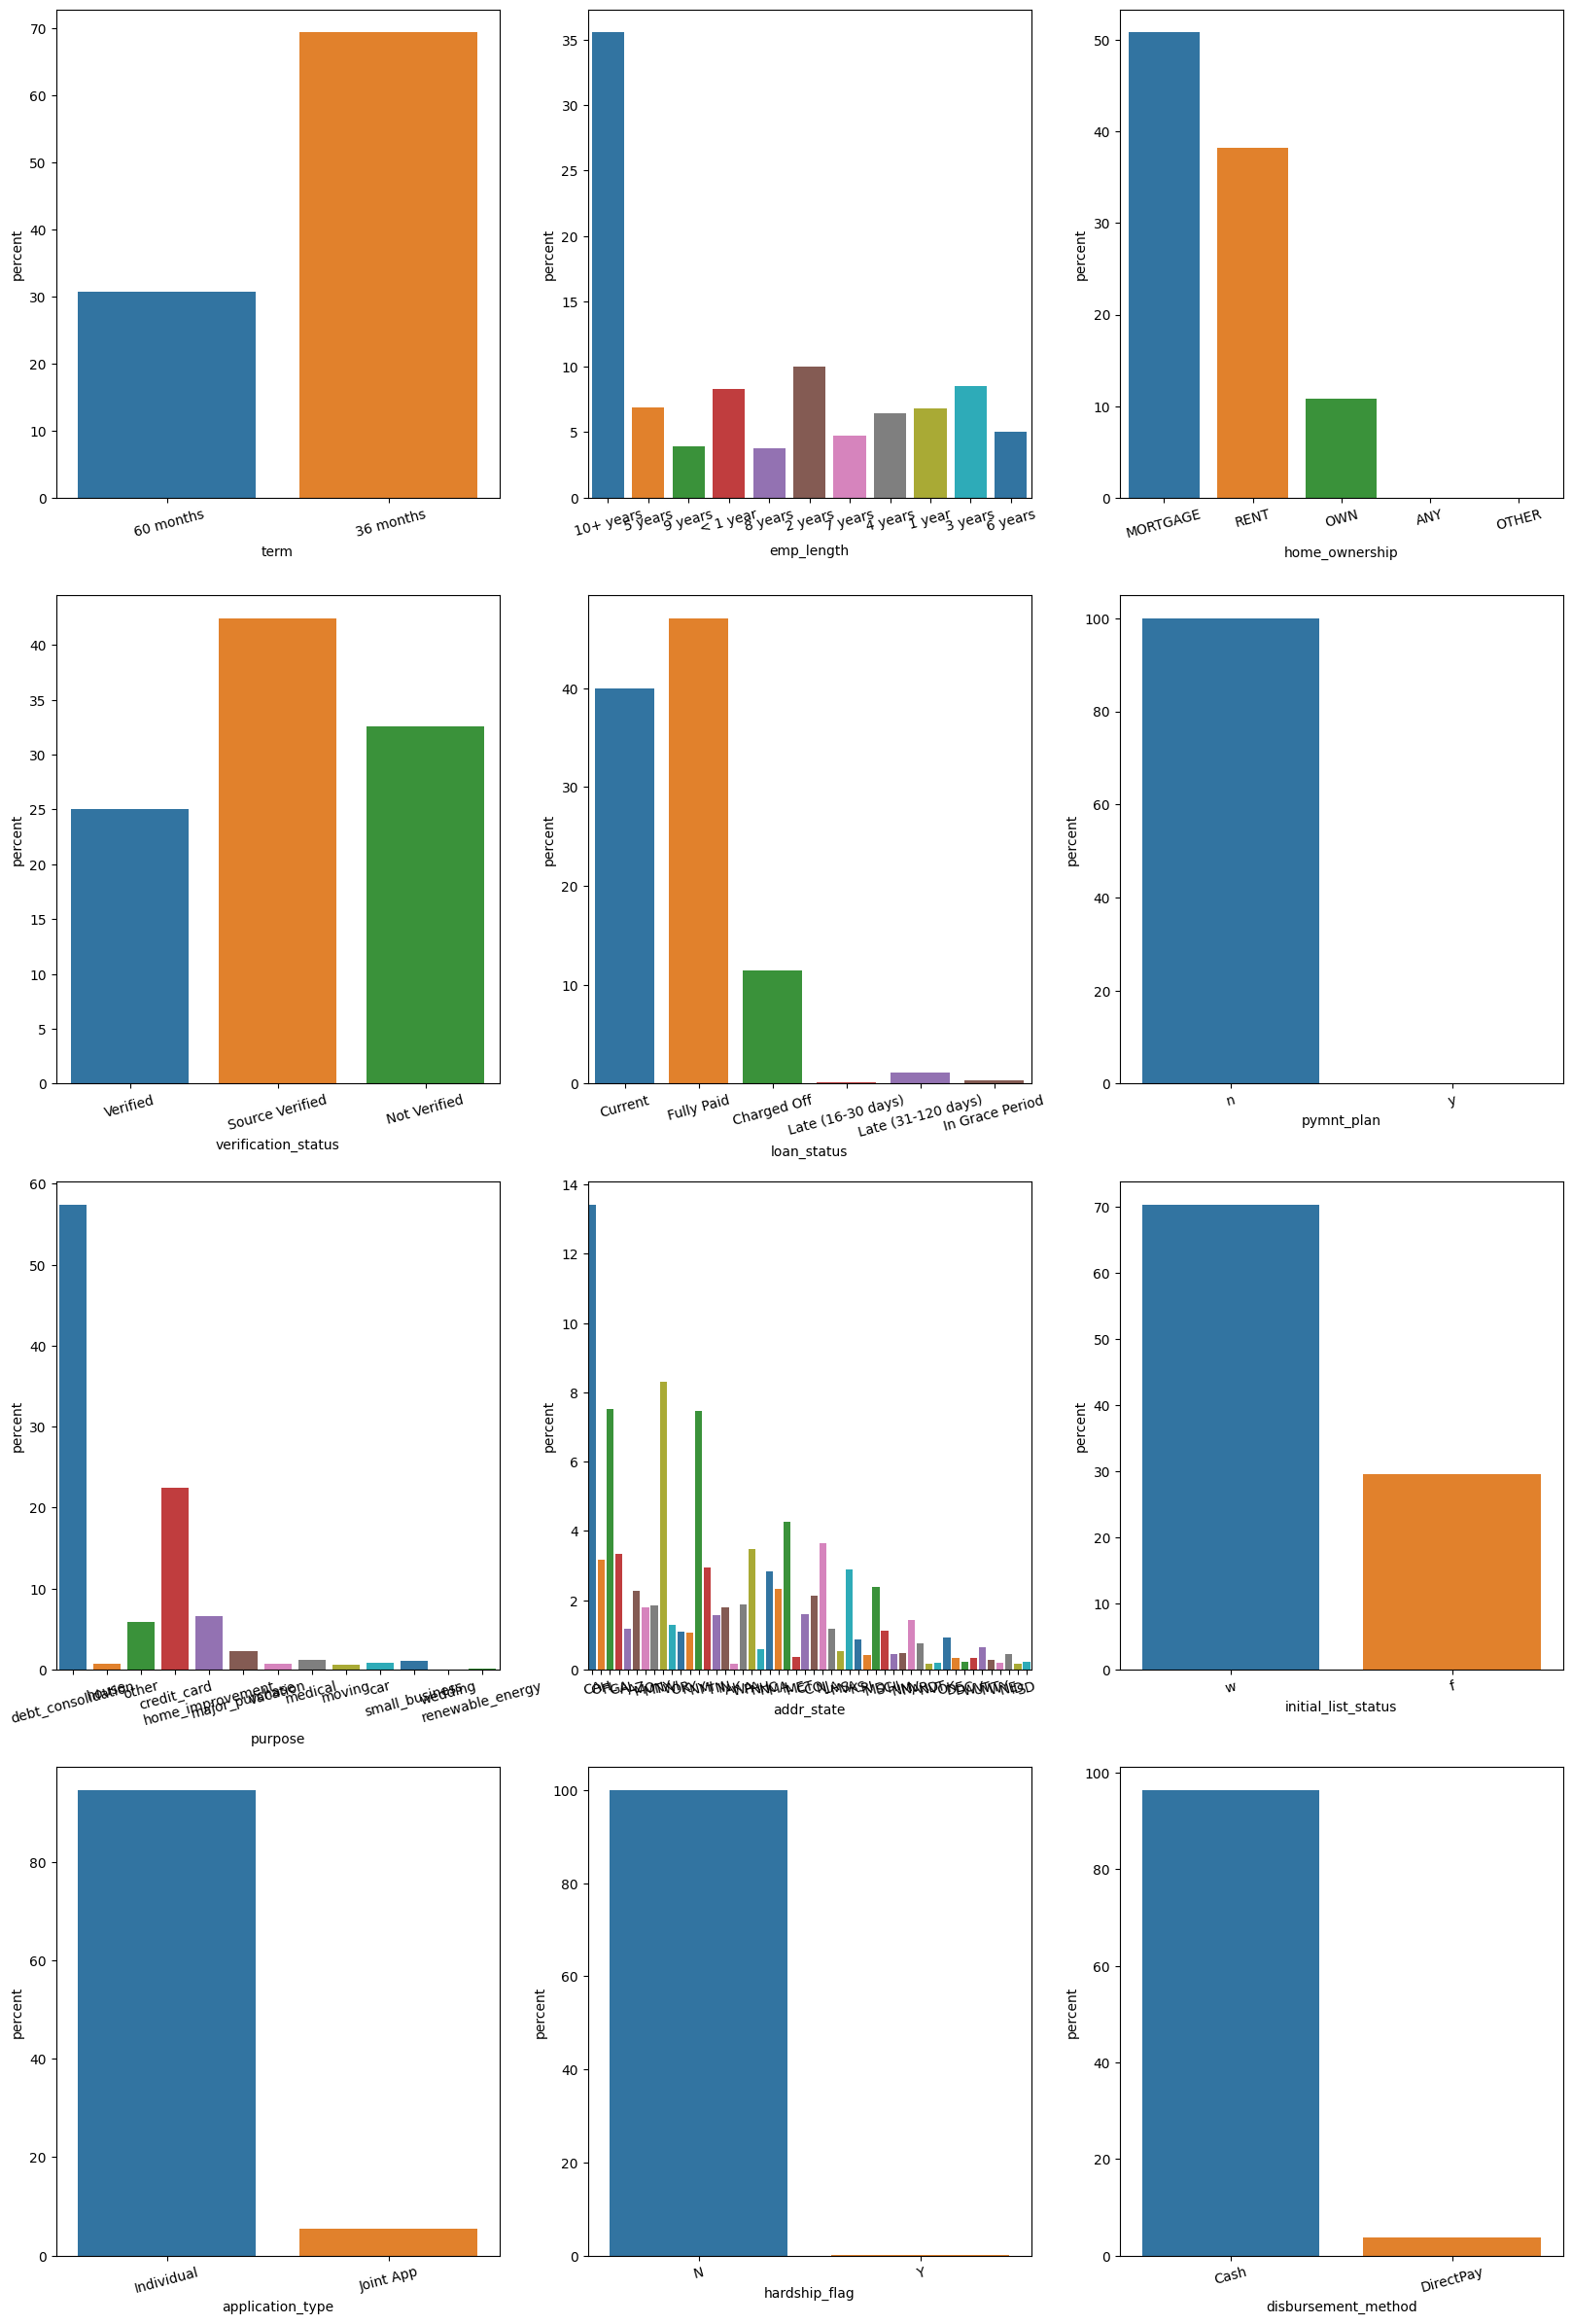

In [44]:
fig, ax = plt.subplots(4, 3, figsize=(20, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(X, x=variable, hue=variable, legend=False, ax=subplot, palette=sns.color_palette(), stat="percent")
    for label in subplot.get_xticklabels():
        label.set_rotation(15)

As we can see we have different kinds for categorical data, like ordinal data (e.g. "emp_lenght"), nominal data (e.g. "addr_state") and boolean data (e.g. "term"). To be able to process these inputs with the classifer, we need to numerically encode them. To do this, I will use **one-hot-encoding**:

In [45]:
def encode_data(fit_set, transformed_sets, columns):
    encoder = preprocessing.OneHotEncoder(handle_unknown="ignore").fit(fit_set[columns])
    for set in transformed_sets:
        encoded = encoder.transform(set[columns])
        dfs_encoded = pd.DataFrame(encoded.toarray())
        yield dfs_encoded

X_encoded_train, X_encoded_test, X_encoded_test_final = encode_data(X_train, [X_train, X_test, X_test_final], categorical)

## Numerical variables

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>],
       [<Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'fico_range_low'}>],
       [<Axes: title={'center': 'fico_range_high'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'open_acc'}>],
       [<Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>],
       [<Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={

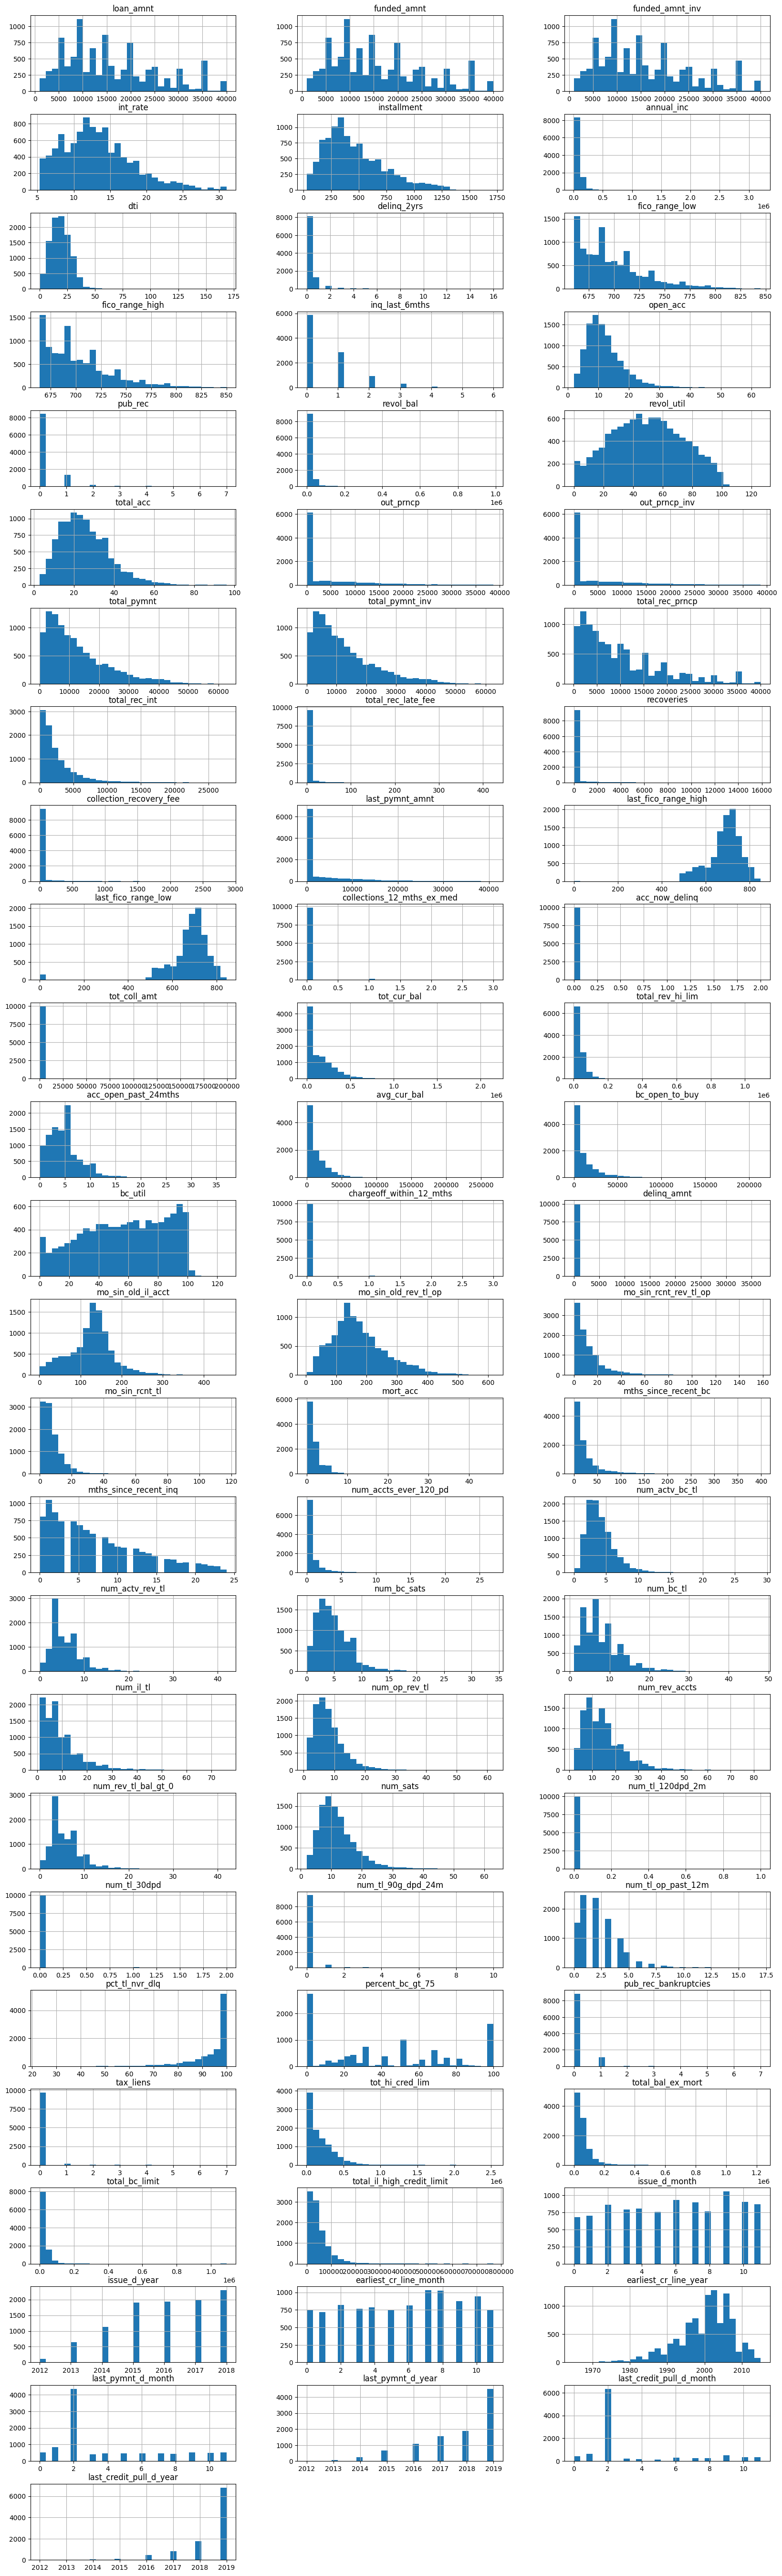

In [46]:
X[numerical].hist(bins=30, figsize=(20, 80), layout=(30, 3))

To be able to use the numerical data with a distance based classifier (such as kNN), the data needs to be **normalized** and **scaled**, this is done here by using the normalize and standard scaler functions provided in sklearn.

In [47]:
def scale_and_normalize(data_set, columns):
    normalizer = preprocessing.Normalizer().fit(data_set[columns])
    df_norm = normalizer.transform(data_set[columns])
    
    scaler = preprocessing.StandardScaler().fit(df_norm)
    df_normscaled = scaler.transform(df_norm)
    df_normscaled = pd.DataFrame(df_normscaled, columns=list(data_set[columns]))
    return df_normscaled

X_sn_train = scale_and_normalize(X_train, numerical)
X_sn_test = scale_and_normalize(X_test, numerical)
X_sn_test_final = scale_and_normalize(X_test_final, numerical)

Now I visualize the transformed and scaled data again:

In [48]:
# df_train_normscaled.hist(bins=30, figsize=(20, 80), layout=(30, 3))

## Re-combining the datasets

At last, I combine the 2 preprocessed dataframes into a single one, on which the algorithms will run.

In [49]:
def recombine_datasets(df_num, df_cat):
    return pd.concat([df_num, df_cat], axis=1)
    
X_train = recombine_datasets(X_sn_train, X_encoded_train)
X_test = recombine_datasets(X_sn_test, X_encoded_test)
X_test_final = recombine_datasets(X_sn_test_final, X_encoded_test_final)

X_train = X_train.rename(str, axis="columns")
X_test = X_test.rename(str, axis="columns")
X_test_final = X_test_final.rename(str, axis="columns")

## Pre-selecting features using correlation

In [50]:
# By looking at the correlation between variables, we can determine "duplicates", meaning variables that are strongly correlated to others and can therefore be remvoed (since else there would be multiple variables providing the same information!)
def correlation_selection(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                col_corr.add(corr_matrix.columns[i])
                print(dataset.columns[i]," with ",dataset.columns[j]," correlate ",corr_matrix.iloc[i,j])
    return col_corr

col_corr = correlation_selection(X_train, 0.9)


funded_amnt  with  loan_amnt  correlate  1.0
funded_amnt_inv  with  loan_amnt  correlate  0.9999942180824811
funded_amnt_inv  with  funded_amnt  correlate  0.9999942180824811
installment  with  loan_amnt  correlate  0.9624491468827736
installment  with  funded_amnt  correlate  0.9624491468827736
installment  with  funded_amnt_inv  correlate  0.9624041391241406
fico_range_high  with  fico_range_low  correlate  0.9999999275283817
out_prncp_inv  with  out_prncp  correlate  0.9999979481721277
total_pymnt_inv  with  total_pymnt  correlate  0.9999956114185644
total_rec_prncp  with  total_pymnt  correlate  0.9672925923474599
total_rec_prncp  with  total_pymnt_inv  correlate  0.9672653088562835
collection_recovery_fee  with  recoveries  correlate  0.9855015012458614
last_fico_range_high  with  fico_range_low  correlate  0.9851173104766716
last_fico_range_high  with  fico_range_high  correlate  0.9851219094575823
last_fico_range_low  with  fico_range_low  correlate  0.9466645578866261
last_fico

In [51]:
# only use the columns that were found using the training data set and remove those from the test sets --> avoid data leakage this way!
def drop_cols(data_set, cols):
    return data_set.drop(list(cols), axis=1)

X_train = drop_cols(X_train, col_corr)
X_test = drop_cols(X_test, col_corr)
X_test_final = drop_cols(X_test_final, col_corr)

# Classifying the data
At first I tried classifying the data with the standard parameter values that are selected for each model (except for the random state in the decision tree classifier).

In [52]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier

def model_classification(model, train_set, test_set, predict_train, predict_test, return_accs=False):
    # training the classifier
    mod = model.fit(train_set, predict_train)
    
    # predicting the target values
    pred_train_mod = mod.predict(train_set)
    pred_test_mod = mod.predict(test_set)
    
    # calculating the accuracy
    acc_train = metrics.accuracy_score(pred_train_mod, predict_train)
    acc_test = metrics.accuracy_score(pred_test_mod, predict_test)
    print(f"Train accuracy: {acc_train}\nTest accuracy: {acc_test}")
    
    # plotting a confucion matrix
    cm = metrics.confusion_matrix(y_true=predict_test, y_pred=pred_test_mod)
    plot = metrics.ConfusionMatrixDisplay(cm, display_labels=grades)
    plot.plot(cmap=plt.cm.Blues)
    plt.show()
    
    # printing a classification report
    report_mod = metrics.classification_report(y_true=predict_test, y_pred=pred_test_mod, labels=np.unique(predict_test))
    print(report_mod)
    if return_accs:
        return mod, acc_train, acc_test
    else:
        return mod

## kNN

Train accuracy: 0.5674626865671641
Test accuracy: 0.35909090909090907


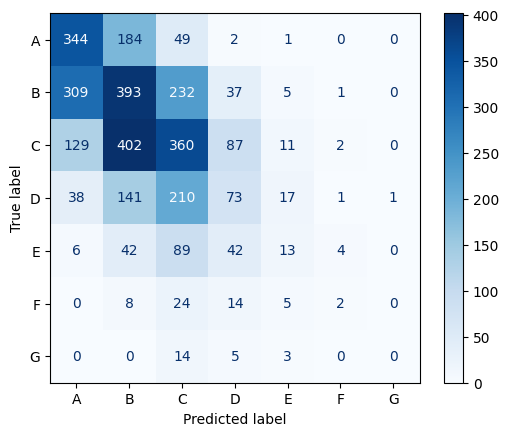

              precision    recall  f1-score   support

           A       0.42      0.59      0.49       580
           B       0.34      0.40      0.37       977
           C       0.37      0.36      0.37       991
           D       0.28      0.15      0.20       481
           E       0.24      0.07      0.10       196
           F       0.20      0.04      0.06        53
           G       0.00      0.00      0.00        22

    accuracy                           0.36      3300
   macro avg       0.26      0.23      0.23      3300
weighted avg       0.34      0.36      0.34      3300



In [53]:
kNN = model_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

### Naive Bayes

Train accuracy: 0.35447761194029853
Test accuracy: 0.3290909090909091


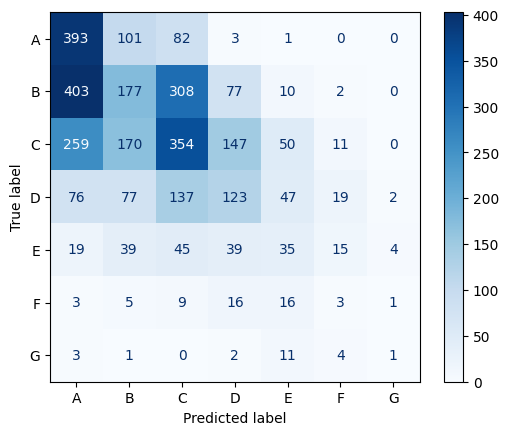

              precision    recall  f1-score   support

           A       0.34      0.68      0.45       580
           B       0.31      0.18      0.23       977
           C       0.38      0.36      0.37       991
           D       0.30      0.26      0.28       481
           E       0.21      0.18      0.19       196
           F       0.06      0.06      0.06        53
           G       0.12      0.05      0.07        22

    accuracy                           0.33      3300
   macro avg       0.25      0.25      0.23      3300
weighted avg       0.32      0.33      0.31      3300



In [54]:
bayes = model_classification(naive_bayes.BernoulliNB(), X_train, X_test, y_train, y_test)

### Decision Tree

Train accuracy: 1.0
Test accuracy: 0.6287878787878788


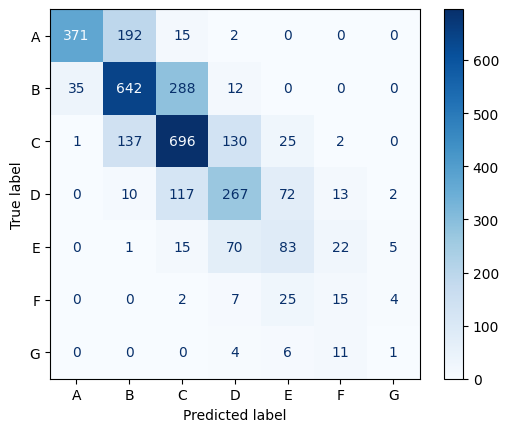

              precision    recall  f1-score   support

           A       0.91      0.64      0.75       580
           B       0.65      0.66      0.66       977
           C       0.61      0.70      0.66       991
           D       0.54      0.56      0.55       481
           E       0.39      0.42      0.41       196
           F       0.24      0.28      0.26        53
           G       0.08      0.05      0.06        22

    accuracy                           0.63      3300
   macro avg       0.49      0.47      0.48      3300
weighted avg       0.65      0.63      0.63      3300



In [55]:
dtc = model_classification(DecisionTreeClassifier(random_state=100),X_train, X_test, y_train, y_test)

# Comparison of the models:
## holdout:

In [56]:
models_full_feat = {"kNN": kNN, "bayes": bayes, "decision tree": dtc}

def compare_models_holdout(models: dict, test_set, predict_test):
    for name, model in models.items():
        prediction = model.predict(test_set)
        acc = round(metrics.accuracy_score(predict_test, prediction), 4)
        print(f"Model '{name}' accuracy score on testset: {acc}")
compare_models_holdout(models_full_feat, X_test, y_test)

Model 'kNN' accuracy score on testset: 0.3591
Model 'bayes' accuracy score on testset: 0.3291
Model 'decision tree' accuracy score on testset: 0.6288


## Cross validation:

In [57]:
from sklearn.model_selection import cross_val_score

def compare_models_cv(models, data_set, predict_set):
    for name, model in models.items():
        cv_score = cross_val_score(model, data_set, predict_set, cv=5)
        mean_acc = round((sum(cv_score)/len(cv_score)), 4)
        
        print(f"Cross Validation accuracies for {name}: {cv_score}")
        print(f"Mean accuracy for {name}: {mean_acc}\n")
        
compare_models_cv(models_full_feat, X_train, y_train)

Cross Validation accuracies for kNN: [0.39253731 0.35970149 0.38880597 0.3761194  0.35298507]
Mean accuracy for kNN: 0.374

Cross Validation accuracies for bayes: [0.31567164 0.34104478 0.3358209  0.31865672 0.32985075]
Mean accuracy for bayes: 0.3282

Cross Validation accuracies for decision tree: [0.6641791  0.69552239 0.68656716 0.67761194 0.66343284]
Mean accuracy for decision tree: 0.6775



## Feature selection
For feature selection I chose the SelectKBest algorithm, with the metric fs.f_classif to determine the k best features to use for predictions.

In [58]:
from sklearn import feature_selection as fs
def select_features(train_set, test_set, prediction_train, k=-1):
    if k == -1:
        k = train_set.shape[-1]
    sel = fs.SelectKBest(fs.f_classif, k=k)
    sel.fit_transform(train_set, prediction_train)
    cols_idxs = sel.get_support(indices=True)
    train_sel = train_set.iloc[:,cols_idxs]
    if test_set is not None:
        test_sel = test_set.iloc[:,cols_idxs]
        return train_sel, test_sel
    else:
        return train_sel

number of features selected: 8
KNN:
Train accuracy: 0.6347761194029851
Test accuracy: 0.46575757575757576


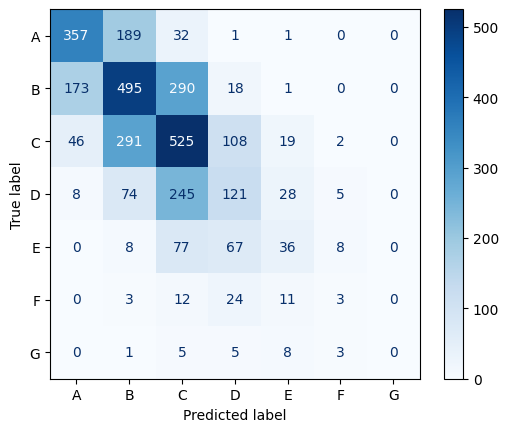

              precision    recall  f1-score   support

           A       0.61      0.62      0.61       580
           B       0.47      0.51      0.49       977
           C       0.44      0.53      0.48       991
           D       0.35      0.25      0.29       481
           E       0.35      0.18      0.24       196
           F       0.14      0.06      0.08        53
           G       0.00      0.00      0.00        22

    accuracy                           0.47      3300
   macro avg       0.34      0.31      0.31      3300
weighted avg       0.45      0.47      0.45      3300

BAYES:
Train accuracy: 0.40044776119402986
Test accuracy: 0.39515151515151514


c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

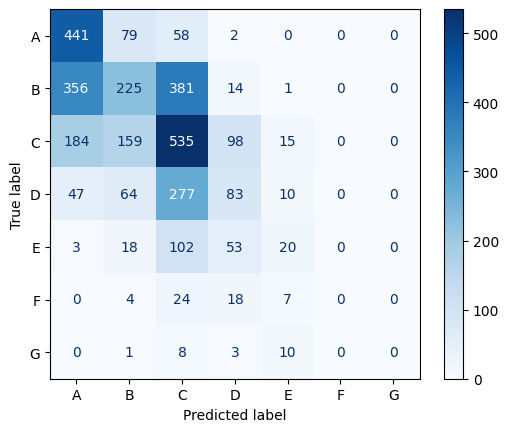

c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           A       0.43      0.76      0.55       580
           B       0.41      0.23      0.29       977
           C       0.39      0.54      0.45       991
           D       0.31      0.17      0.22       481
           E       0.32      0.10      0.15       196
           F       0.00      0.00      0.00        53
           G       0.00      0.00      0.00        22

    accuracy                           0.40      3300
   macro avg       0.26      0.26      0.24      3300
weighted avg       0.38      0.40      0.36      3300

DECISION_TREE:
Train accuracy: 1.0
Test accuracy: 0.43666666666666665


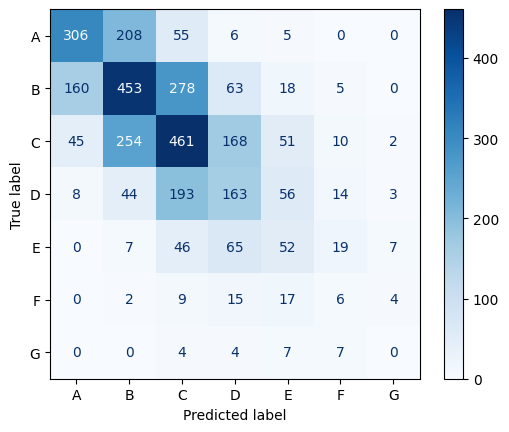

              precision    recall  f1-score   support

           A       0.59      0.53      0.56       580
           B       0.47      0.46      0.47       977
           C       0.44      0.47      0.45       991
           D       0.34      0.34      0.34       481
           E       0.25      0.27      0.26       196
           F       0.10      0.11      0.11        53
           G       0.00      0.00      0.00        22

    accuracy                           0.44      3300
   macro avg       0.31      0.31      0.31      3300
weighted avg       0.44      0.44      0.44      3300

number of features selected: 30
KNN:
Train accuracy: 0.5847761194029851
Test accuracy: 0.4084848484848485


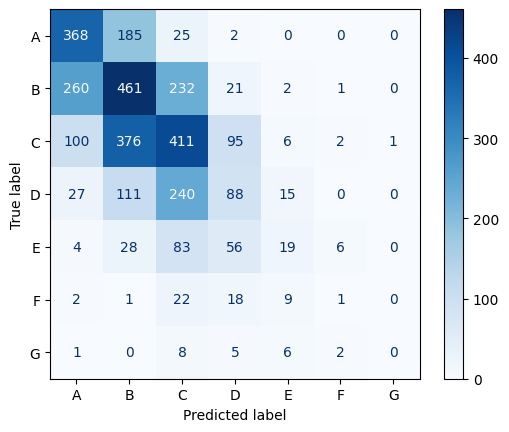

              precision    recall  f1-score   support

           A       0.48      0.63      0.55       580
           B       0.40      0.47      0.43       977
           C       0.40      0.41      0.41       991
           D       0.31      0.18      0.23       481
           E       0.33      0.10      0.15       196
           F       0.08      0.02      0.03        53
           G       0.00      0.00      0.00        22

    accuracy                           0.41      3300
   macro avg       0.29      0.26      0.26      3300
weighted avg       0.39      0.41      0.39      3300

BAYES:
Train accuracy: 0.3825373134328358
Test accuracy: 0.36696969696969695


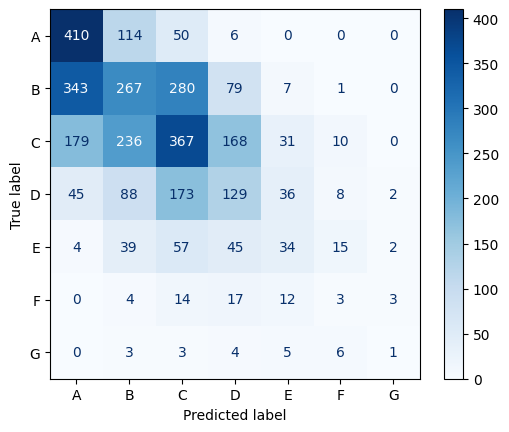

              precision    recall  f1-score   support

           A       0.42      0.71      0.53       580
           B       0.36      0.27      0.31       977
           C       0.39      0.37      0.38       991
           D       0.29      0.27      0.28       481
           E       0.27      0.17      0.21       196
           F       0.07      0.06      0.06        53
           G       0.12      0.05      0.07        22

    accuracy                           0.37      3300
   macro avg       0.27      0.27      0.26      3300
weighted avg       0.36      0.37      0.35      3300

DECISION_TREE:
Train accuracy: 1.0
Test accuracy: 0.6454545454545455


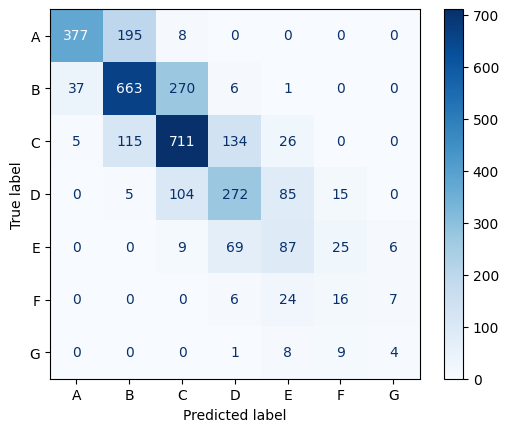

              precision    recall  f1-score   support

           A       0.90      0.65      0.75       580
           B       0.68      0.68      0.68       977
           C       0.65      0.72      0.68       991
           D       0.56      0.57      0.56       481
           E       0.38      0.44      0.41       196
           F       0.25      0.30      0.27        53
           G       0.24      0.18      0.21        22

    accuracy                           0.65      3300
   macro avg       0.52      0.51      0.51      3300
weighted avg       0.66      0.65      0.65      3300

number of features selected: 60
KNN:
Train accuracy: 0.5722388059701492
Test accuracy: 0.36757575757575756


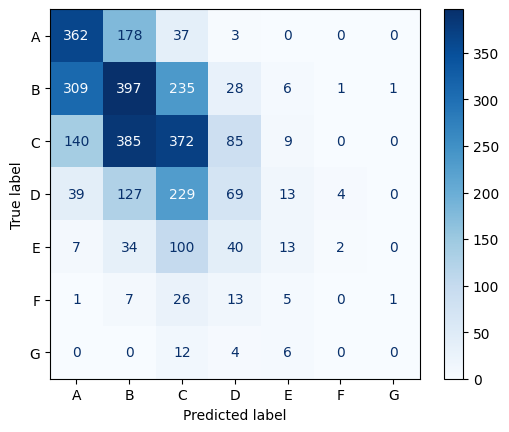

              precision    recall  f1-score   support

           A       0.42      0.62      0.50       580
           B       0.35      0.41      0.38       977
           C       0.37      0.38      0.37       991
           D       0.29      0.14      0.19       481
           E       0.25      0.07      0.10       196
           F       0.00      0.00      0.00        53
           G       0.00      0.00      0.00        22

    accuracy                           0.37      3300
   macro avg       0.24      0.23      0.22      3300
weighted avg       0.35      0.37      0.35      3300

BAYES:
Train accuracy: 0.3482089552238806
Test accuracy: 0.3236363636363636


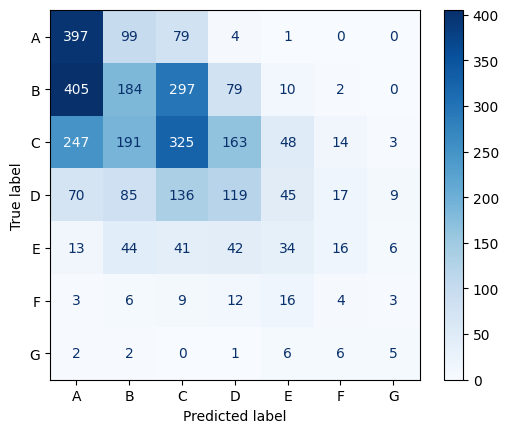

              precision    recall  f1-score   support

           A       0.35      0.68      0.46       580
           B       0.30      0.19      0.23       977
           C       0.37      0.33      0.35       991
           D       0.28      0.25      0.26       481
           E       0.21      0.17      0.19       196
           F       0.07      0.08      0.07        53
           G       0.19      0.23      0.21        22

    accuracy                           0.32      3300
   macro avg       0.25      0.27      0.25      3300
weighted avg       0.32      0.32      0.31      3300

DECISION_TREE:
Train accuracy: 1.0
Test accuracy: 0.6224242424242424


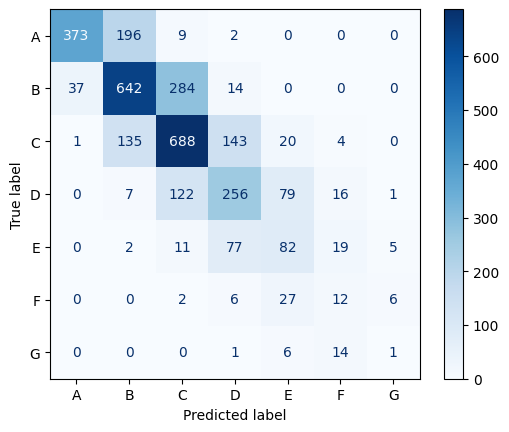

              precision    recall  f1-score   support

           A       0.91      0.64      0.75       580
           B       0.65      0.66      0.66       977
           C       0.62      0.69      0.65       991
           D       0.51      0.53      0.52       481
           E       0.38      0.42      0.40       196
           F       0.18      0.23      0.20        53
           G       0.08      0.05      0.06        22

    accuracy                           0.62      3300
   macro avg       0.48      0.46      0.46      3300
weighted avg       0.64      0.62      0.63      3300

number of features selected: 157
KNN:
Train accuracy: 0.5674626865671641
Test accuracy: 0.35909090909090907


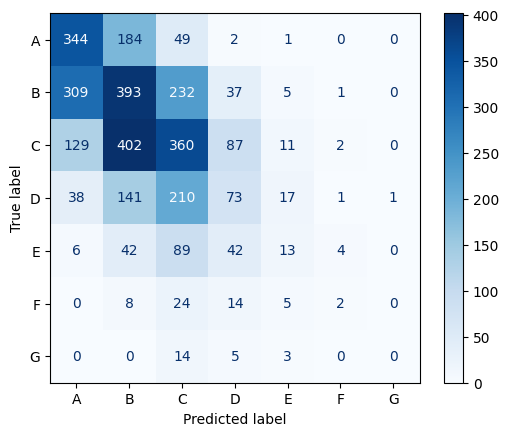

              precision    recall  f1-score   support

           A       0.42      0.59      0.49       580
           B       0.34      0.40      0.37       977
           C       0.37      0.36      0.37       991
           D       0.28      0.15      0.20       481
           E       0.24      0.07      0.10       196
           F       0.20      0.04      0.06        53
           G       0.00      0.00      0.00        22

    accuracy                           0.36      3300
   macro avg       0.26      0.23      0.23      3300
weighted avg       0.34      0.36      0.34      3300

BAYES:
Train accuracy: 0.35447761194029853
Test accuracy: 0.3290909090909091


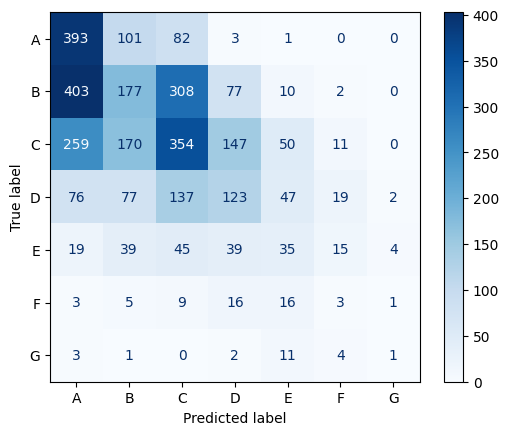

              precision    recall  f1-score   support

           A       0.34      0.68      0.45       580
           B       0.31      0.18      0.23       977
           C       0.38      0.36      0.37       991
           D       0.30      0.26      0.28       481
           E       0.21      0.18      0.19       196
           F       0.06      0.06      0.06        53
           G       0.12      0.05      0.07        22

    accuracy                           0.33      3300
   macro avg       0.25      0.25      0.23      3300
weighted avg       0.32      0.33      0.31      3300

DECISION_TREE:
Train accuracy: 1.0
Test accuracy: 0.623030303030303


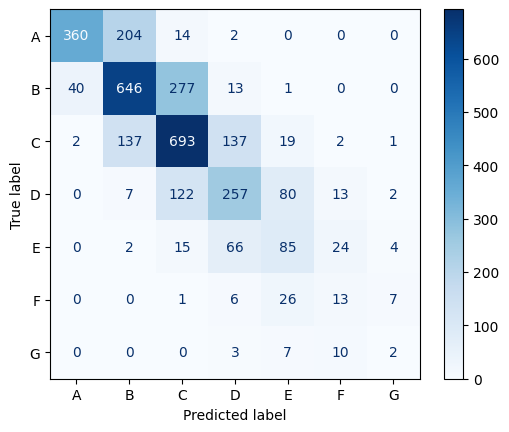

              precision    recall  f1-score   support

           A       0.90      0.62      0.73       580
           B       0.65      0.66      0.65       977
           C       0.62      0.70      0.66       991
           D       0.53      0.53      0.53       481
           E       0.39      0.43      0.41       196
           F       0.21      0.25      0.23        53
           G       0.12      0.09      0.11        22

    accuracy                           0.62      3300
   macro avg       0.49      0.47      0.47      3300
weighted avg       0.64      0.62      0.63      3300



In [59]:
sel_df_train_8, sel_df_test_8 = select_features(X_train, X_test, y_train, 8)
sel_df_train_30, sel_df_test_30 = select_features(X_train, X_test, y_train, 30)
sel_df_train_60, sel_df_test_60 = select_features(X_train, X_test, y_train, 60)

def test_all_models(models, train_set, test_set, prediction_train, prediction_test):
    print(f"number of features selected: {train_set.shape[-1]}")
    mod_dict = {}
    accs_train = []
    accs_test = []
    for name, model in models.items():
        print(name.upper() + ":")
        mod, acc_train, acc_test = model_classification(model, train_set, test_set, prediction_train, prediction_test, return_accs=True)
        mod_dict.update({name: mod})
        accs_train.append(acc_train)
        accs_test.append(acc_test)
    
    return mod_dict, accs_train, accs_test

models = {"kNN": KNeighborsClassifier(), "bayes": naive_bayes.BernoulliNB(), "decision_tree": DecisionTreeClassifier()}
models_8_feat, accs_train_8, accs_test_8 = test_all_models(models, sel_df_train_8, sel_df_test_8, y_train, y_test)
models_30_feat, accs_train_30, accs_test_30 = test_all_models(models, sel_df_train_30, sel_df_test_30, y_train, y_test)
models_60_feat, accs_train_60, accs_test_60 = test_all_models(models, sel_df_train_60, sel_df_test_60, y_train, y_test)
models_full, accs_train_full, accs_test_full = test_all_models(models, X_train, X_test, y_train, y_test)

accs_train = [accs_train_8, accs_train_30, accs_train_60, accs_train_full]
accs_test = [accs_test_8, accs_test_30, accs_test_60, accs_test_full]

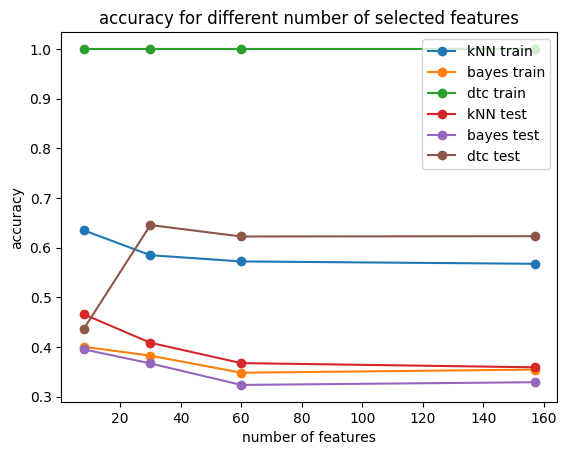

,kNN train,bayes train,dtc train,kNN test,bayes test,dtc test,k
0,0.634776,0.400448,1.0,0.465758,0.395152,0.436667,8
1,0.584776,0.382537,1.0,0.408485,0.366970,0.645455,30
2,0.572239,0.348209,1.0,0.367576,0.323636,0.622424,60
3,0.567463,0.354478,1.0,0.359091,0.329091,0.623030,157


In [60]:
accs_train_df = pd.DataFrame(np.matrix(accs_train), columns=["kNN train", "bayes train", "dtc train"])
accs_test_df = pd.DataFrame(np.matrix(accs_test), columns=["kNN test", "bayes test", "dtc test"])
accs_df = pd.concat([accs_train_df ,accs_test_df], axis=1)
cols = list(accs_df)
accs_df["k"] = pd.Series([8, 30, 60, X_train.shape[-1]])

for i in cols:
    plt.plot(accs_df["k"], accs_df[i], marker="o")
    plt.legend(cols, loc="upper right")
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.title("accuracy for different number of selected features")
plt.savefig(r"..\results\k_best_comp.png")
plt.show()

accs_df

# Hyperparameter optimization and feature selection
Here I tried optimizing the hyperparameters, for the models with different features sizes

In [61]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

sel_df_8 = select_features(train_set=X, test_set=None, prediction_train=y, k=8)
sel_df_30 = select_features(train_set=X, test_set=None, prediction_train=y, k=30)
sel_df_60 = select_features(train_set=X, test_set=None, prediction_train=y, k=60)
train_sets = [sel_df_8, sel_df_30, sel_df_60, X]

## GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def tune_hyperparameters_Gridsearch(model, parameters, x_train, y_train):
    classifier = GridSearchCV(model, parameters, cv=5)
    classifier.fit(x_train, y_train)

    best_parameters = classifier.best_params_
    highest_accuracy = classifier.best_score_

    result = pd.DataFrame(classifier.cv_results_)

    return best_parameters, highest_accuracy, result

def tune_hyperparameters_Randomizedsearch(model, parameters, x_train, y_train):
    classifier = RandomizedSearchCV(model, parameters, cv=5)
    classifier.fit(x_train, y_train)

    best_parameters = classifier.best_params_
    highest_accuracy = classifier.best_score_

    result = pd.DataFrame(classifier.cv_results_)

    return best_parameters, highest_accuracy, result

def tune_multiple(model, train_sets, prediction_train, parameters, how="grid"):
    models = []
    for train_set in train_sets:
        if how.lower()=="grid":
            best_params, best_accuracy, result = tune_hyperparameters_Gridsearch(model, parameters, train_set, prediction_train) 
        else:
            best_params, best_accuracy, result = tune_hyperparameters_Randomizedsearch(model, parameters, train_set, prediction_train)
        print(f"Results for k={train_set.shape[-1]}:\nBest parameters for: {best_params}\nBest accuracy: {best_accuracy}")
        models.append({"model": model, "best_params": best_params, "best_accuracy": best_accuracy, "k": train_set.shape[-1]})
    return models

## kNN

In [63]:
parameters_kNN = {"n_neighbors": list(range(30, 41, 2)),
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "manhattan"]
                  }

models_kNN_grid = tune_multiple(KNeighborsClassifier(), train_sets, y, parameters_kNN, how="grid")

Results for k=8:
Best parameters for: {'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'distance'}
Best accuracy: 0.499
Results for k=30:
Best parameters for: {'metric': 'manhattan', 'n_neighbors': 38, 'weights': 'distance'}
Best accuracy: 0.4726
Results for k=60:
Best parameters for: {'metric': 'manhattan', 'n_neighbors': 40, 'weights': 'distance'}
Best accuracy: 0.4447
Results for k=157:
Best parameters for: {'metric': 'manhattan', 'n_neighbors': 36, 'weights': 'distance'}
Best accuracy: 0.44190000000000007


## Naive Bayes

In [64]:
parameters_bayes = {"fit_prior": [True, False],
                    "binarize": [0.5, 0.2, 0.0, None],
                    "alpha": [0.7, 0.8, 0.9, 1.0]
                    }

models_bayes_grid = tune_multiple(naive_bayes.BernoulliNB(), train_sets, y, parameters_bayes, how="grid")

c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

Results for k=8:
Best parameters for: {'alpha': 0.7, 'binarize': 0.0, 'fit_prior': True}
Best accuracy: 0.3968


c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

Results for k=30:
Best parameters for: {'alpha': 1.0, 'binarize': 0.5, 'fit_prior': True}
Best accuracy: 0.37920000000000004


c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

Results for k=60:
Best parameters for: {'alpha': 0.7, 'binarize': 0.5, 'fit_prior': True}
Best accuracy: 0.3458


c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

Results for k=157:
Best parameters for: {'alpha': 1.0, 'binarize': 0.5, 'fit_prior': True}
Best accuracy: 0.3425


## Decision Tree

In [65]:
parameters_dtc = {"criterion": ["gini"],
                  "max_depth": list(range(13, 17, 1)),
                  "random_state": [100],
                  "min_samples_leaf": list(range(10, 17, 1))
                  }

models_dtc_grid = tune_multiple(DecisionTreeClassifier(), train_sets, y, parameters_dtc, how="grid")

Results for k=8:
Best parameters for: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 15, 'random_state': 100}
Best accuracy: 0.48739999999999994
Results for k=30:
Best parameters for: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 12, 'random_state': 100}
Best accuracy: 0.736
Results for k=60:
Best parameters for: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 14, 'random_state': 100}
Best accuracy: 0.7247
Results for k=157:
Best parameters for: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 15, 'random_state': 100}
Best accuracy: 0.7192000000000001


# RandomizedSearchCV

## kNN

In [66]:
models_kNN_random = tune_multiple(KNeighborsClassifier(), train_sets, y, parameters_kNN, how="random")

Results for k=8:
Best parameters for: {'weights': 'distance', 'n_neighbors': 36, 'metric': 'euclidean'}
Best accuracy: 0.49759999999999993
Results for k=30:
Best parameters for: {'weights': 'uniform', 'n_neighbors': 30, 'metric': 'manhattan'}
Best accuracy: 0.47050000000000003
Results for k=60:
Best parameters for: {'weights': 'distance', 'n_neighbors': 36, 'metric': 'manhattan'}
Best accuracy: 0.43970000000000004
Results for k=157:
Best parameters for: {'weights': 'distance', 'n_neighbors': 36, 'metric': 'manhattan'}
Best accuracy: 0.44190000000000007


## Naive Bayes

In [67]:
models_bayes_random = tune_multiple(naive_bayes.BernoulliNB(), train_sets, y, parameters_bayes, how="random")

c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

Results for k=8:
Best parameters for: {'fit_prior': True, 'binarize': 0.0, 'alpha': 0.9}
Best accuracy: 0.39649999999999996


c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

Results for k=30:
Best parameters for: {'fit_prior': True, 'binarize': 0.5, 'alpha': 0.7}
Best accuracy: 0.379


c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

Results for k=60:
Best parameters for: {'fit_prior': True, 'binarize': 0.2, 'alpha': 1.0}
Best accuracy: 0.3343


c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

Results for k=157:
Best parameters for: {'fit_prior': True, 'binarize': 0.5, 'alpha': 0.9}
Best accuracy: 0.3424


c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1224: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1209: RuntimeWarning: invalid value encountered in log
  self.feature_log_

## Decision Tree

In [68]:
models_dtc_random = tune_multiple(DecisionTreeClassifier(), train_sets, y, parameters_dtc, how="random")

Results for k=8:
Best parameters for: {'random_state': 100, 'min_samples_leaf': 15, 'max_depth': 16, 'criterion': 'gini'}
Best accuracy: 0.48739999999999994
Results for k=30:
Best parameters for: {'random_state': 100, 'min_samples_leaf': 14, 'max_depth': 14, 'criterion': 'gini'}
Best accuracy: 0.7349
Results for k=60:
Best parameters for: {'random_state': 100, 'min_samples_leaf': 14, 'max_depth': 14, 'criterion': 'gini'}
Best accuracy: 0.7246
Results for k=157:
Best parameters for: {'random_state': 100, 'min_samples_leaf': 15, 'max_depth': 16, 'criterion': 'gini'}
Best accuracy: 0.7186000000000001


### Visualizing the results

In [69]:
all_mod_base = accs_df[["kNN test", "bayes test", "dtc test", "k"]]
all_mod_base = all_mod_base.set_index("k")
all_mod_base = all_mod_base.stack().reset_index()
all_mod_base = all_mod_base.rename(columns={"level_1": "model", 0: "best_accuracy"})
all_mod_base = all_mod_base.replace("kNN test", "KNeighborsClassifier")
all_mod_base = all_mod_base.replace("bayes test", "BernoulliNB")
all_mod_base = all_mod_base.replace("dtc test", "DecisionTreeClassifier")
all_mod_base

,k,model,best_accuracy
0,8,KNeighborsClassifier,0.465758
1,8,BernoulliNB,0.395152
2,8,DecisionTreeClassifier,0.436667
3,30,KNeighborsClassifier,0.408485
4,30,BernoulliNB,0.366970
5,30,DecisionTreeClassifier,0.645455
6,60,KNeighborsClassifier,0.367576
7,60,BernoulliNB,0.323636
8,60,DecisionTreeClassifier,0.622424
9,157,KNeighborsClassifier,0.359091


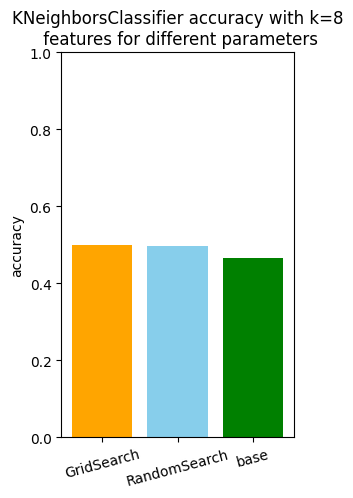

{'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'distance'}
{'weights': 'distance', 'n_neighbors': 36, 'metric': 'euclidean'}
nan


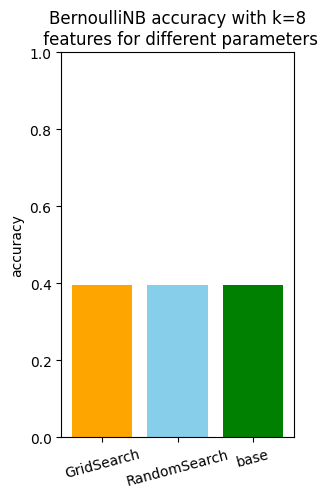

{'alpha': 0.7, 'binarize': 0.0, 'fit_prior': True}
{'fit_prior': True, 'binarize': 0.0, 'alpha': 0.9}
nan


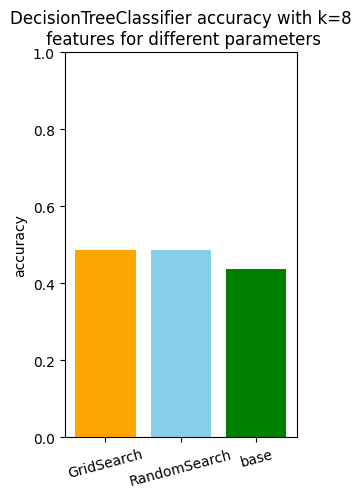

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 15, 'random_state': 100}
{'random_state': 100, 'min_samples_leaf': 15, 'max_depth': 16, 'criterion': 'gini'}
nan


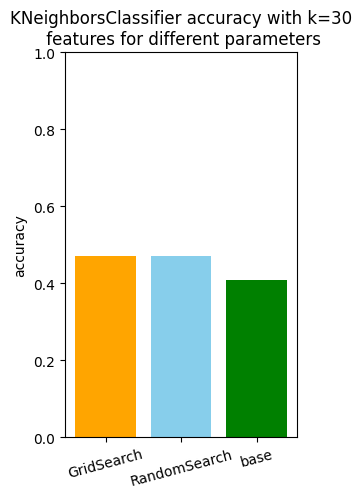

{'metric': 'manhattan', 'n_neighbors': 38, 'weights': 'distance'}
{'weights': 'uniform', 'n_neighbors': 30, 'metric': 'manhattan'}
nan


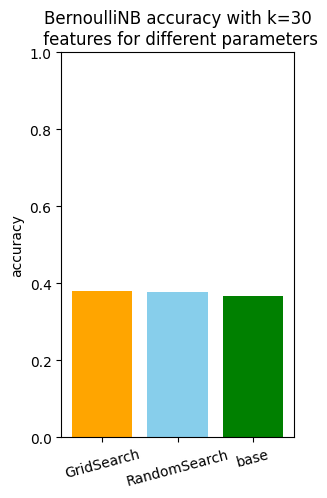

{'alpha': 1.0, 'binarize': 0.5, 'fit_prior': True}
{'fit_prior': True, 'binarize': 0.5, 'alpha': 0.7}
nan


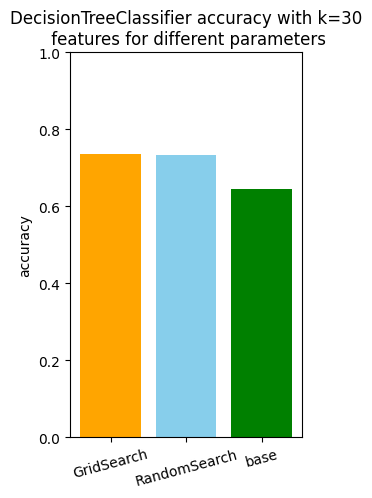

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 12, 'random_state': 100}
{'random_state': 100, 'min_samples_leaf': 14, 'max_depth': 14, 'criterion': 'gini'}
nan


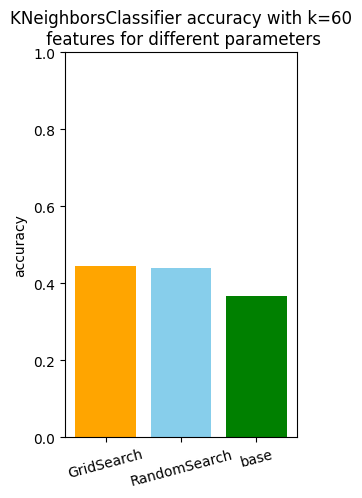

{'metric': 'manhattan', 'n_neighbors': 40, 'weights': 'distance'}
{'weights': 'distance', 'n_neighbors': 36, 'metric': 'manhattan'}
nan


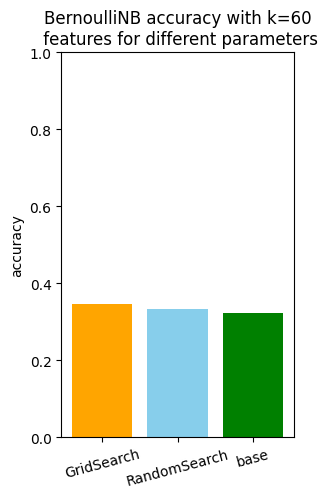

{'alpha': 0.7, 'binarize': 0.5, 'fit_prior': True}
{'fit_prior': True, 'binarize': 0.2, 'alpha': 1.0}
nan


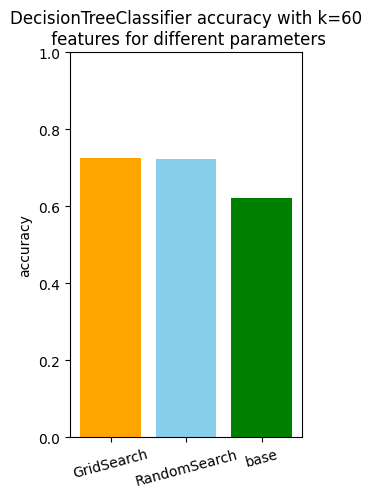

{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 14, 'random_state': 100}
{'random_state': 100, 'min_samples_leaf': 14, 'max_depth': 14, 'criterion': 'gini'}
nan


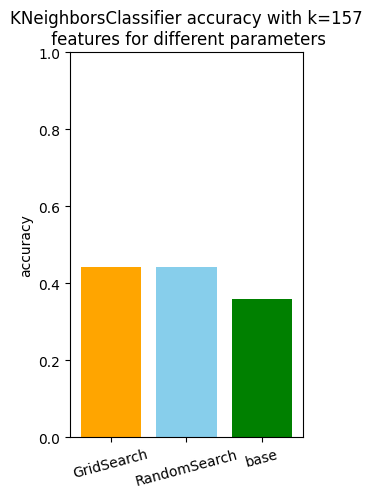

{'metric': 'manhattan', 'n_neighbors': 36, 'weights': 'distance'}
{'weights': 'distance', 'n_neighbors': 36, 'metric': 'manhattan'}
nan


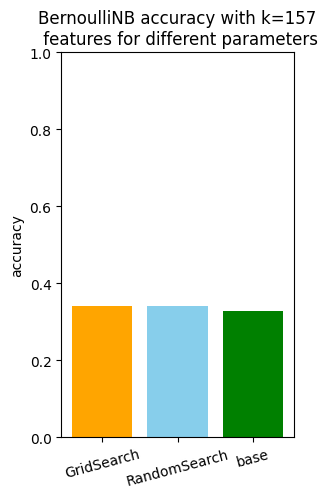

{'alpha': 1.0, 'binarize': 0.5, 'fit_prior': True}
{'fit_prior': True, 'binarize': 0.5, 'alpha': 0.9}
nan


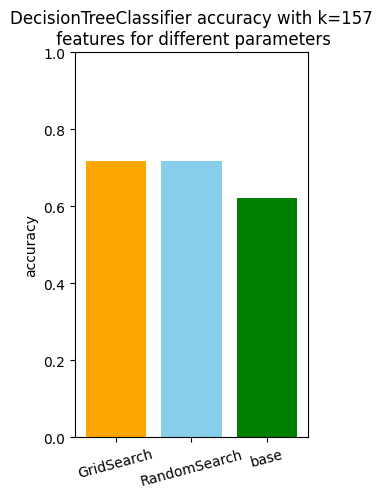

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 15, 'random_state': 100}
{'random_state': 100, 'min_samples_leaf': 15, 'max_depth': 16, 'criterion': 'gini'}
nan


In [70]:
all_mod_grid = [models_kNN_grid, models_bayes_grid, models_dtc_grid]
all_mod_random = [models_kNN_random, models_bayes_random, models_dtc_random]


def visualize_params(models_grid, models_random, models_og):
    df_list = []
    for model in models_grid:
        df_list.append(pd.DataFrame.from_dict(model))
    df_grid = pd.concat(df_list)
    df_grid["model"] = df_grid["model"].apply(lambda x: type(x).__name__)
    
    df_list = []
    for model in models_random:
        df_list.append(pd.DataFrame.from_dict(model))
    df_random = pd.concat(df_list)
    df_random["model"] = df_random["model"].apply(lambda x: type(x).__name__)
    
    ks = df_grid["k"].unique()
    mods = df_grid["model"].unique()
    
    for k in ks:
        grid = df_grid[df_grid["k"] == k]
        rand = df_random[df_random["k"] == k]
        base = models_og[models_og["k"] == k]
        df = pd.concat([grid, rand, base])
        for mod in mods:
            df_mod = df[df["model"] == mod]
            plt.figure(figsize=(3, 5))
            plt.bar(x=["GridSearch", "RandomSearch", "base"], height=df_mod["best_accuracy"], color=["orange", "skyblue", "green"])
            plt.title(f"{mod} accuracy with k={k}\n features for different parameters")
            
            plt.ylabel("accuracy")
            plt.xticks(rotation=15)
            ax = plt.gca()
            ax.set_ylim([0, 1])
            plt.savefig(r"..\results\param_comp_{}_k_{}.png".format(mod, k), bbox_inches="tight")
            plt.show()
            for i in df_mod["best_params"]:
                print(i)

visualize_params(all_mod_grid, all_mod_random, all_mod_base)

## Results:
From the process above, I see that the decision-tree classifier that was attained with GridSearchCV and k=30 features selected performs the best with an accuracy of almost 75%, this is the classifier I will use to predict the test-set, for some additional visualization, I have plotted the confusion matrix of this classifier below.  

In [71]:
import time

def train_model(model, model_name, train_set, test_set, predict_train, predict_test, best_params):
    fit_start = time.time()
    model = model(**best_params).fit(train_set, predict_train)
    fit_end = time.time()
    print(f"Time taken for fitting: {fit_end - fit_start} seconds")
    features = list(train_set)
    
    pred_start = time.time()
    pred_test_dtc = model.predict(test_set[features])
    pred_end = time.time()
    print(f"Time taken for predicting: {pred_end - pred_start} seconds")
    
    summary = metrics.classification_report(y_true=predict_test, y_pred=pred_test_dtc)
    print(summary)
    cm = metrics.confusion_matrix(y_true=predict_test, y_pred=pred_test_dtc)
    plot = metrics.ConfusionMatrixDisplay(cm, display_labels=grades)
    plot.plot(cmap=plt.cm.Blues)
    savepath = rf"{os.pardir}/results/best_{model_name}.png"
    plt.savefig(savepath)
    plt.show()
    return model

Time taken for fitting: 0.008217573165893555 seconds
Time taken for predicting: 0.07909679412841797 seconds
              precision    recall  f1-score   support

           A       0.68      0.59      0.63       580
           B       0.50      0.53      0.52       977
           C       0.45      0.64      0.53       991
           D       0.35      0.20      0.25       481
           E       0.36      0.11      0.17       196
           F       0.00      0.00      0.00        53
           G       0.00      0.00      0.00        22

    accuracy                           0.49      3300
   macro avg       0.33      0.30      0.30      3300
weighted avg       0.47      0.49      0.47      3300



c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

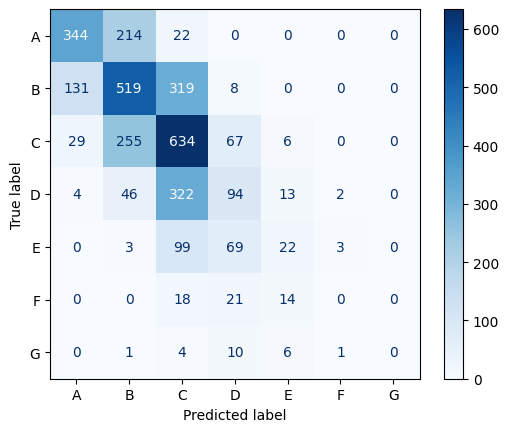

Time taken for fitting: 0.008155107498168945 seconds
Time taken for predicting: 0.0014526844024658203 seconds
              precision    recall  f1-score   support

           A       0.43      0.76      0.55       580
           B       0.41      0.23      0.29       977
           C       0.39      0.54      0.45       991
           D       0.31      0.17      0.22       481
           E       0.32      0.10      0.15       196
           F       0.00      0.00      0.00        53
           G       0.00      0.00      0.00        22

    accuracy                           0.40      3300
   macro avg       0.26      0.26      0.24      3300
weighted avg       0.38      0.40      0.36      3300



c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

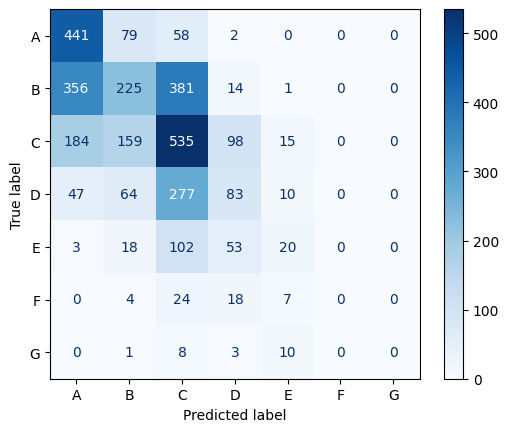

Time taken for fitting: 0.12313127517700195 seconds
Time taken for predicting: 0.001194000244140625 seconds
              precision    recall  f1-score   support

           A       0.92      0.67      0.77       580
           B       0.70      0.71      0.71       977
           C       0.68      0.80      0.74       991
           D       0.60      0.64      0.62       481
           E       0.43      0.36      0.39       196
           F       0.26      0.23      0.24        53
           G       0.00      0.00      0.00        22

    accuracy                           0.69      3300
   macro avg       0.51      0.49      0.50      3300
weighted avg       0.69      0.69      0.69      3300



c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

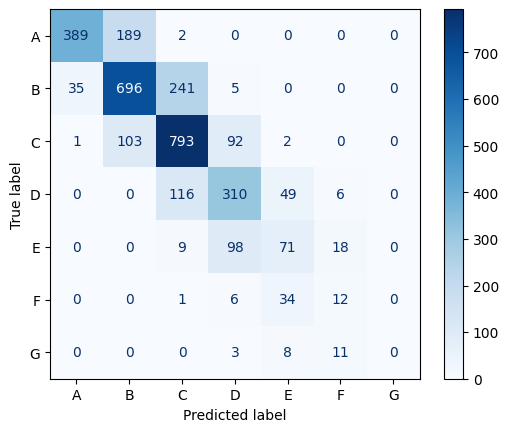

In [72]:
best_kNN = train_model(KNeighborsClassifier, "kNN", sel_df_train_8, X_test, y_train, y_test, models_kNN_grid[0]["best_params"])
best_bayes = train_model(naive_bayes.BernoulliNB, "bayes", sel_df_train_8, X_test, y_train, y_test, models_bayes_grid[0]["best_params"])
best_dtc = train_model(DecisionTreeClassifier, "dtc", sel_df_train_30, X_test, y_train, y_test, models_dtc_grid[1]["best_params"])
best_models = {
    "best_kNNasdfa": best_kNN,
    "best_bayes": best_bayes,
    "best_dtc": best_dtc
}

for filename, model in best_models.items():
    with open(f"{os.pardir}/trained_models/{filename}.pkl", "wb") as f:
        pickle.dump(model, f)

## Predicting the test set
Using the previously defined best model, the test-dataset is now predicted:

In [73]:
features = list(sel_df_train_30)
final_prediction = best_dtc.predict(X_test_final[features])
df_final_pred = pd.concat([X_test_final_0["id"], pd.Series(final_prediction, name="grade")], axis=1)

savepath = rf"{os.pardir}/results"
df_final_pred.to_csv(savepath + r"\final_pred_loan.csv", index=False)

df_final_pred

,id,grade
0,6,C
1,9,E
2,17,E
3,23,B
4,25,A
...,...,...
9995,99947,B
9996,99950,A
9997,99951,A
9998,99961,C


## Post the results to TUWRD

In [ ]:
import requests
import glob
import os
from datetime import datetime

today = datetime.today().strftime(r"%Y-%m-%d")
access_token = ""       # enter your access token here!

# create the record draft
url = "https://test.researchdata.tuwien.at/api/records"
headers = {
    "Authorization": f"Bearer {access_token}",
    "Content-Type": "application/json"
}
data = {
    "metadata": {
        "creators": [
            {
                "person_or_org": {
                    "family_name": "Tatzberger",
                    "given_name": "Jonas",
                    "type": "personal",
                }
            }
        ],
        "publication_date": today,
        "publisher": "TU Wien",
        "resource_type": {"id": "software"},
        "title": "Loan Classifier results",
        "description": "This record contains the best trained model for each tested classifier aswell as the prediction output of the overall best model.",
        "language": "eng",
        "rights": [
            {
                "id": "cc-by-4.0"
            }
        ]
    },
    "files": {"enabled": True},
}

response_draft = requests.post(url, json=data, headers=headers)

# request the doi
url = f"https://test.researchdata.tuwien.at/api/records/{response_draft.json()['id']}/draft/pids/doi"
headers = {
    "Authorization": f"Bearer {access_token}",
}

response_doi = requests.post(url, headers=headers)



all_files = glob.glob("../trained_models/*")
all_files.extend(glob.glob("../results/*"))
for filepath in all_files:
    filename = os.path.basename(filepath)

    # initialize file upload
    url = f"https://test.researchdata.tuwien.at/api/records/{response_draft.json()['id']}/draft/files"
    headers = {
        "Authorization": f"Bearer {access_token}",
        "Content-Type": "application/json"
    }
    data = [
        {
            "key": filename
        }
    ]
    response_init = requests.post(url, json=data, headers=headers)

    # upload the file
    url = f"https://test.researchdata.tuwien.at/api/records/{response_draft.json()['id']}/draft/files/{filename}/content"
    headers = {
        "Authorization": f"Bearer {access_token}",
        "Content-Type": "application/octet-stream"
    }
    with open(filepath, "rb") as file_data:
        response_post = requests.put(url, headers=headers, data=file_data)

    # commit
    url = f"https://test.researchdata.tuwien.at/api/records/{response_draft.json()['id']}/draft/files/{filename}/commit"
    headers = {
        "Authorization": f"Bearer {access_token}",
    }

    response_commit = requests.post(url, headers=headers)

print(f"The draft has been created and the files have been uploaded, you can finalize and publish it on: \n{response_draft.json()["links"]["self_html"]}")


The draft has been created and the files have been uploaded, you can finalize and publish it on: 
https://test.researchdata.tuwien.at/uploads/y1a1d-9vr36


# APPENDIX - trying to counteract the dataset imbalance using over-/under-sampling

In [74]:
from sklearn.utils import resample
train_full = pd.concat([X_train, y_train.reset_index()], axis=1)
grades = ["A", "B", "C", "D", "E", "F", "G"]

def resample_df(data, n_samples):
    resampled = []
    for g in grades:
        df_grade = data[data["grade"] == g]
        if n_samples > df_grade.shape[0]:
            df_resampled = resample(df_grade, replace=True, n_samples=n_samples)
        else:
            df_resampled = resample(df_grade, replace=False, n_samples=n_samples)
        resampled.append(df_resampled)
    
    return pd.concat(resampled, axis=0)

c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 69  94 105 122 124 137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\tatzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Results for k=30:
Best parameters for: {'random_state': 100, 'min_samples_leaf': 13, 'max_depth': 15, 'criterion': 'gini'}
Best accuracy: 0.3728571428571429
0.2909090909090909


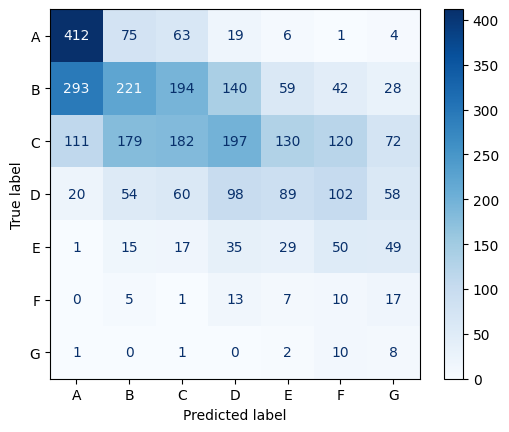

              precision    recall  f1-score   support

           A       0.49      0.71      0.58       580
           B       0.40      0.23      0.29       977
           C       0.35      0.18      0.24       991
           D       0.20      0.20      0.20       481
           E       0.09      0.15      0.11       196
           F       0.03      0.19      0.05        53
           G       0.03      0.36      0.06        22

    accuracy                           0.29      3300
   macro avg       0.23      0.29      0.22      3300
weighted avg       0.35      0.29      0.30      3300



In [75]:
train_new = resample_df(train_full, 100)
X_train_new = train_new.drop(["grade", "index"], axis=1)
y_train_new = train_new["grade"]

X_train_new_sel = select_features(train_set=X_train_new, test_set=None, prediction_train=y_train_new, k=30)

best_params, best_accuracy, result = tune_hyperparameters_Randomizedsearch(DecisionTreeClassifier(), parameters_dtc, X_train_new_sel, y_train_new)
print(f"Results for k={X_train_new_sel.shape[-1]}:\nBest parameters for: {best_params}\nBest accuracy: {best_accuracy}")

best_model = DecisionTreeClassifier(**best_params).fit(X_train_new_sel, y_train_new)
features = list(X_train_new_sel)

pred_test_dtc = best_model.predict(X_test[features])
acc = metrics.accuracy_score(y_true=y_test, y_pred=pred_test_dtc)
print(acc)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=pred_test_dtc)
plot = metrics.ConfusionMatrixDisplay(cm, display_labels=grades)
plot.plot(cmap=plt.cm.Blues)
plt.show()
summary = metrics.classification_report(y_true=y_test, y_pred=pred_test_dtc)
print(summary)

Results for k=30:
Best parameters for: {'random_state': 100, 'min_samples_leaf': 12, 'max_depth': 16, 'criterion': 'gini'}
Best accuracy: 0.7081428571428571
0.37272727272727274


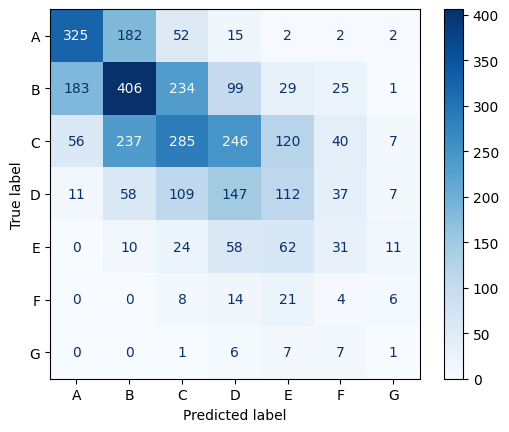

              precision    recall  f1-score   support

           A       0.57      0.56      0.56       580
           B       0.45      0.42      0.43       977
           C       0.40      0.29      0.33       991
           D       0.25      0.31      0.28       481
           E       0.18      0.32      0.23       196
           F       0.03      0.08      0.04        53
           G       0.03      0.05      0.04        22

    accuracy                           0.37      3300
   macro avg       0.27      0.29      0.27      3300
weighted avg       0.40      0.37      0.38      3300



In [76]:
train_new = resample_df(train_full, 2000)
X_train_new = train_new.drop(["grade", "index"], axis=1)
y_train_new = train_new["grade"]

X_train_new_sel = select_features(train_set=X_train_new, test_set=None, prediction_train=y_train_new, k=30)

best_params, best_accuracy, result = tune_hyperparameters_Randomizedsearch(DecisionTreeClassifier(), parameters_dtc, X_train_new_sel, y_train_new)
print(f"Results for k={X_train_new_sel.shape[-1]}:\nBest parameters for: {best_params}\nBest accuracy: {best_accuracy}")

best_model = DecisionTreeClassifier(**best_params).fit(X_train_new_sel, y_train_new)
features = list(X_train_new_sel)

pred_test_dtc = best_model.predict(X_test[features])
acc = metrics.accuracy_score(y_true=y_test, y_pred=pred_test_dtc)
print(acc)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=pred_test_dtc)
plot = metrics.ConfusionMatrixDisplay(cm, display_labels=grades)
plot.plot(cmap=plt.cm.Blues)
plt.show()
summary = metrics.classification_report(y_true=y_test, y_pred=pred_test_dtc)
print(summary)